<a href="https://colab.research.google.com/github/Mwauracollins/holy-gpt/blob/main/src/bigram/bigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import string

In [2]:
input_file = "drive/MyDrive/Datasets/bible.txt"

In [3]:
words = open(input_file, "r").read().split()

In [4]:
import re
words = [word for word in words if not re.search(r"\d", word)]


In the cell below, we remove the punctuations in a word. It is generally a good way to remove punctuations esp if they appear at the end of beginning of words due to sentence boundaries. They tend to inflate the no of unique bigrams and does not add to patterns

In [5]:
words = [word.strip(string.punctuation) for word in words]
words[:30]

['Holy',
 'Bible',
 'Authorized',
 'King',
 'James',
 'Version',
 'Textfile',
 'In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 'And',
 'the',
 'earth',
 'was',
 'without',
 'form',
 'and',
 'void',
 'and',
 'darkness',
 'was',
 'upon',
 'the']

In [6]:
vocabs = list(set(words))

In [7]:
chars = sorted(list(set("".join(vocabs))))
len(chars)

53

In [8]:
str_to_int = {char: i + 1 for i, char in enumerate(chars)}
int_to_str = {i: char for i, char in enumerate(chars)}
str_to_int['.'] = 0

In [9]:
for word in words[:30]:
    print(word, "->", [str_to_int[char] for char in word])

Holy -> [10, 42, 39, 52]
Bible -> [4, 36, 29, 39, 32]
Authorized -> [3, 48, 47, 35, 42, 45, 36, 53, 32, 31]
King -> [13, 36, 41, 34]
James -> [12, 28, 40, 32, 46]
Version -> [24, 32, 45, 46, 36, 42, 41]
Textfile -> [22, 32, 51, 47, 33, 36, 39, 32]
In -> [11, 41]
the -> [47, 35, 32]
beginning -> [29, 32, 34, 36, 41, 41, 36, 41, 34]
God -> [9, 42, 31]
created -> [30, 45, 32, 28, 47, 32, 31]
the -> [47, 35, 32]
heaven -> [35, 32, 28, 49, 32, 41]
and -> [28, 41, 31]
the -> [47, 35, 32]
earth -> [32, 28, 45, 47, 35]
And -> [3, 41, 31]
the -> [47, 35, 32]
earth -> [32, 28, 45, 47, 35]
was -> [50, 28, 46]
without -> [50, 36, 47, 35, 42, 48, 47]
form -> [33, 42, 45, 40]
and -> [28, 41, 31]
void -> [49, 42, 36, 31]
and -> [28, 41, 31]
darkness -> [31, 28, 45, 38, 41, 32, 46, 46]
was -> [50, 28, 46]
upon -> [48, 43, 42, 41]
the -> [47, 35, 32]


In [10]:
N = np.zeros((len(chars) + 1, len(chars) + 1), dtype=np.int32)
N

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [11]:
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = str_to_int[ch1]
        ix2 = str_to_int[ch2]
        N[ix1, ix2] += 1

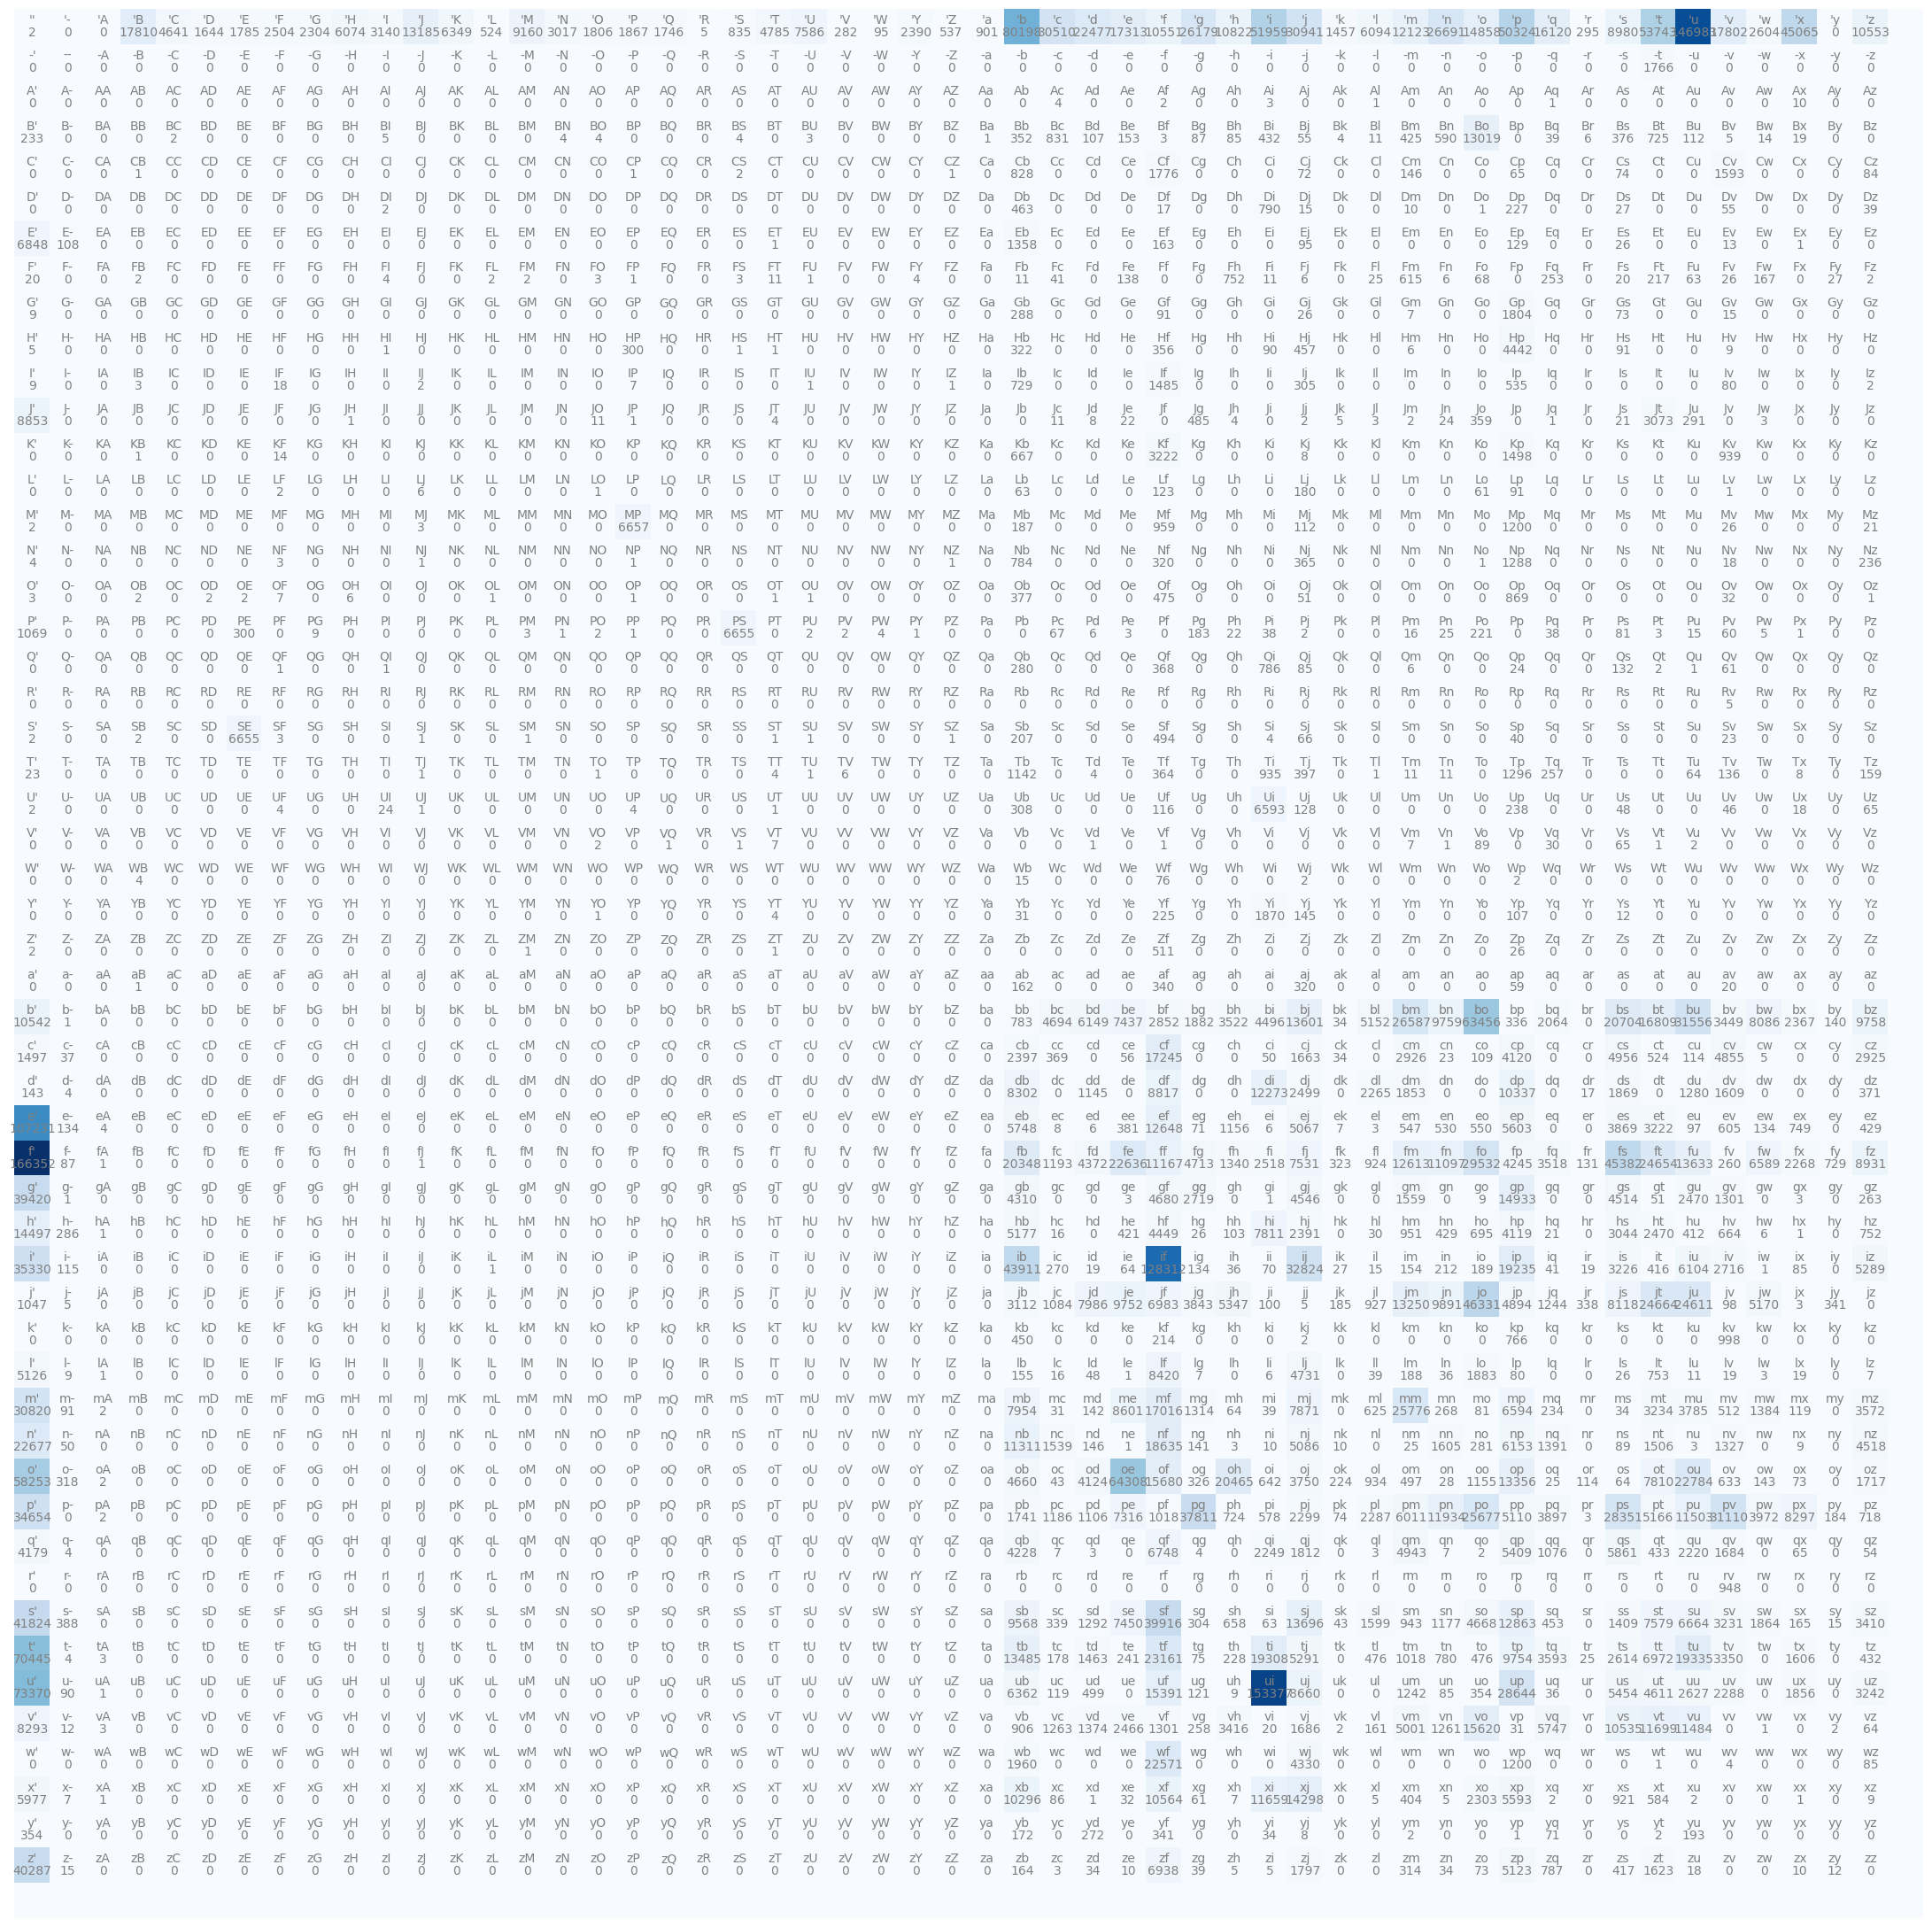

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(28,28))
plt.imshow(N, cmap='Blues')
for i in range(len(chars)):
    for j in range(len(chars)):
        chstr = int_to_str[i] + int_to_str[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

You can notice some bigrams do not occur once in the words.  Consecutive occurence of capital letter bigrams is not possible since capital represents start of a word. We'll make the words all lowercase

In [13]:
words = [word.lower() for word in words]

In [14]:
vocabs = list(set(words))

In [15]:
chars = sorted(list(set("".join(vocabs))))

In [16]:
str_to_int = {char: i + 1 for i, char in enumerate(chars)}
int_to_str = {i: char for i, char in enumerate(chars)}
str_to_int['.'] = 0

In [18]:
N = np.zeros((len(chars) + 1, len(chars) + 1), dtype=np.int32)

In [19]:
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = str_to_int[ch1]
        ix2 = str_to_int[ch2]
        N[ix1, ix2] += 1

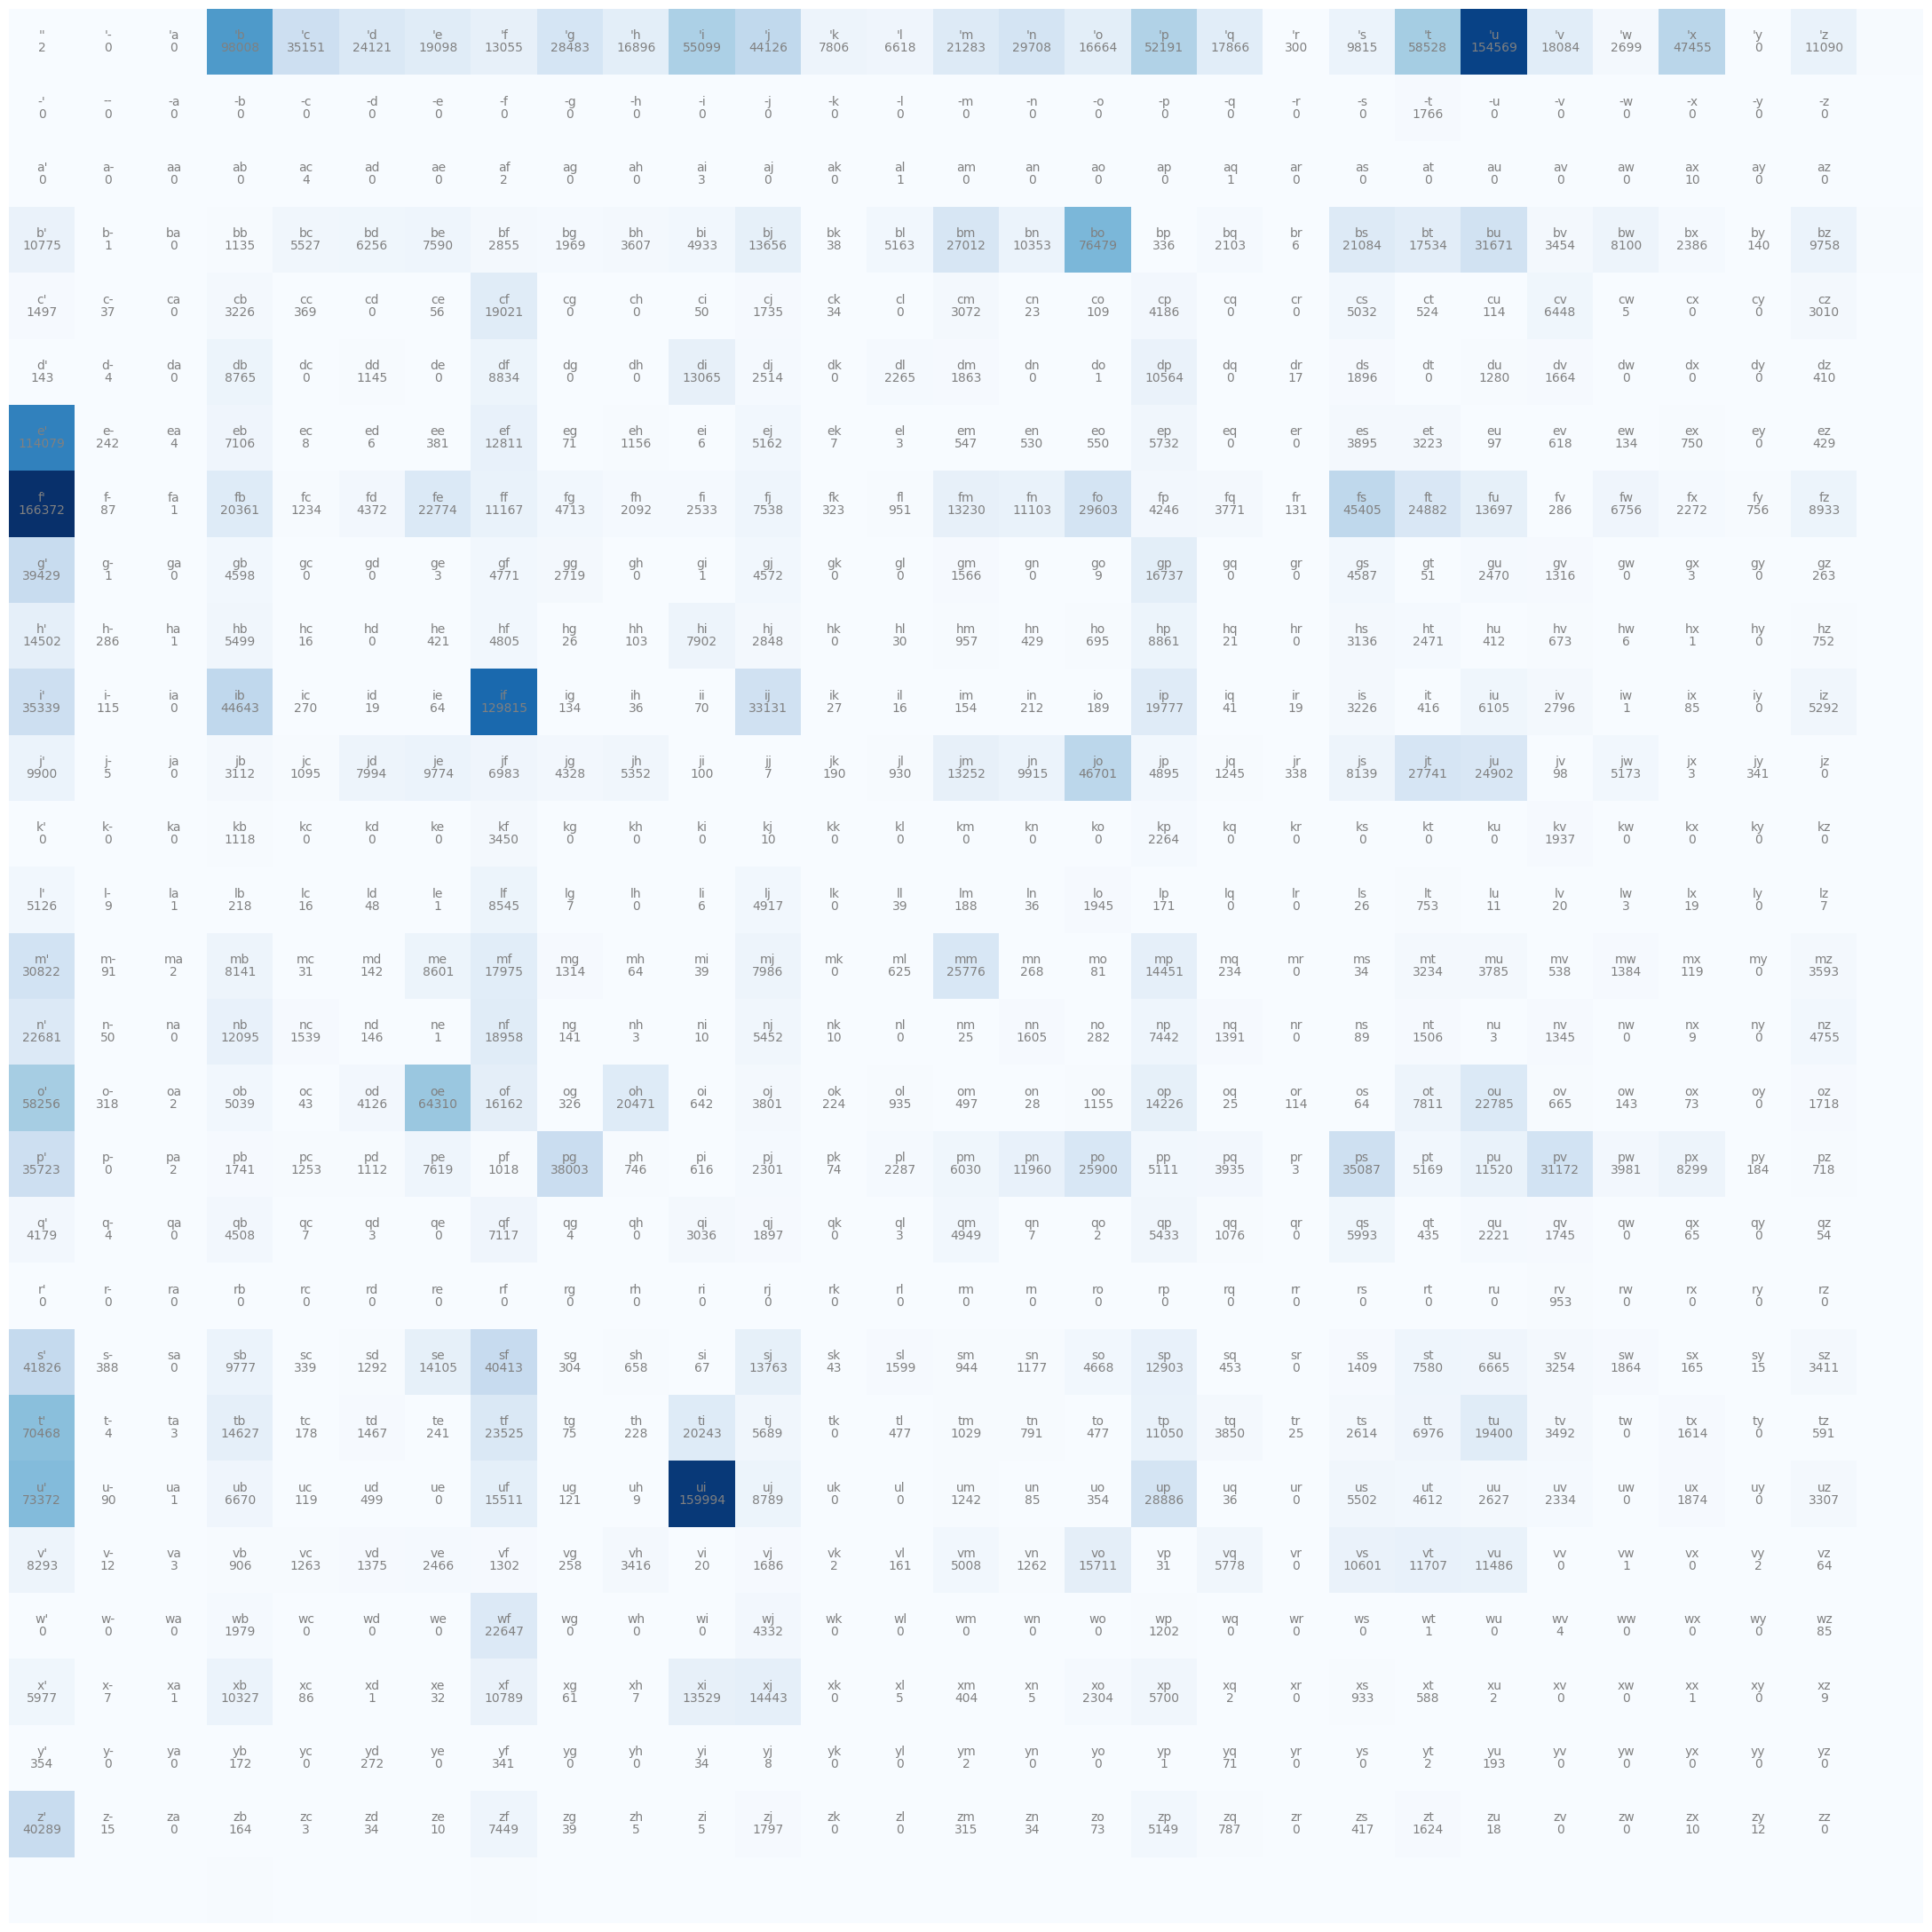

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(28,28))
plt.imshow(N, cmap='Blues')
for i in range(len(chars)):
    for j in range(len(chars)):
        chstr = int_to_str[i] + int_to_str[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [21]:
N[0]

array([     2,      0,      0,  98008,  35151,  24121,  19098,  13055,
        28483,  16896,  55099,  44126,   7806,   6618,  21283,  29708,
        16664,  52191,  17866,    300,   9815,  58528, 154569,  18084,
         2699,  47455,      0,  11090,    927], dtype=int32)

In [22]:
P = (N + 1).astype(np.float32)
P /= P.sum(axis=1, keepdims=True)


In [28]:
g = tf.random.Generator.from_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = tf.random.categorical(tf.math.log([p]), num_samples=1, seed=2147483647).numpy()[0, 0]
        out.append(int_to_str[ix])
        if ix == 0:
            break
    print(''.join(out))


ui'
dif'
uif'
v'
uiftfjo'


In [29]:
log_likelihood = 0.0
n = 0

In [32]:
for w in vocabs:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = str_to_int[ch1]
        ix2 = str_to_int[ch2]
        prob = P[ix1, ix2]
        logprob = np.log(prob)
        log_likelihood += logprob
        n += 1

In [40]:
nll = -log_likelihood
print(f'{log_likelihood=}')
print(f'{nll=}')
print(f'{nll / n}')

log_likelihood=-9084722.095920678
nll=9084722.095920678
2.2062746807168314


In [41]:
xs, ys = [], []

In [42]:
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = str_to_int[ch1]
        ix2 = str_to_int[ch2]
        xs.append(ix1)
        ys.append(ix2)

In [43]:
xs = np.array(xs)
ys = np.array(ys)

In [44]:
xs

array([ 0, 10, 17, 14, 27])

(5, 27)


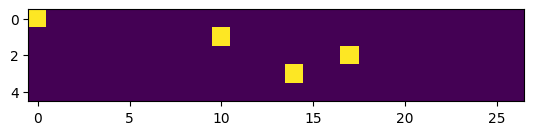

In [45]:
xenc = tf.one_hot(xs, depth=27, dtype=tf.float32)
print(xenc.shape)
plt.imshow(xenc)
plt.show()